# Pokémon Unite Match Analysis

#### About
Pokémon Unite is a free-to-play, cross-platform, multiplayer online battle area video game on Nintendo Switch, Android, iOS. Each match of Unite is a _5 vs. 5_ strategic team battle lasting 10 minutes. Unite's quick format (relative to other MOBAs), brand appeal, and accessibility have gathered a dedicated playerbase with hunger to win matches and climb the ranks.

#### Objective
Since its release in July 2021, Unite has received regular updates in the form of balance patches, new items, playable Pokémon, etc. With every new addition, this seemingly simple 10-minute match grows increasingly more complex. So many micro-factors contribute to a win/loss (_e.g. mechanical skill, team coordination, and map awareness_), all of which can be difficult to evaluate. 

The aim of this analysis is to use broad match statistics (_e.g. damage dealt, KDR, and team composition_), to discover trends that may influence match outcome. The data used in this analysis features personal, ranked match data collected manually from the Pokémon Unite application.

#### Libraries & Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)

#### Import data

In [2]:
xls = pd.ExcelFile('..\Excel\Pokemon Unite Personal Ranked Data.xlsx')
df_match = pd.read_excel(xls, 'Match Data')
df_team = pd.read_excel(xls, 'Team Comp', keep_default_na=False)
df_enemy = pd.read_excel(xls, 'Enemy Comp', keep_default_na=False)
                                            # Mew's moves are labeled by N/a

In [3]:
df_match.head(1)

,ID,Season,Date,Time,Rank,Queue,Pokemon,Move 1,Move 2,Battle Item,Kills,Assists,Damage Done,Damage Taken,Damage Healed,Score,Result
0,1,12,17-06-2023,20:54:00,Ultra,Solo,Eldegoss,Pollen Puff,Cotton Guard,X Speed,4,14,29154,50351,78977,33,Win


In [4]:
df_team.head(1)

,ID,Self,Self Move 1,Self Move 2,Ally 1,Ally 1 Move 1,Ally 1 Move 2,Ally 2,Ally 2 Move 1,Ally 2 Move 2,Ally 3,Ally 3 Move 1,Ally 3 Move 2,Ally 4,Ally 4 Move 1,Ally 4 Move 2
0,1,Eldegoss,Pollen Puff,Cotton Guard,Sylveon,Hyper Voice,Calm Mind,Delphox,Fire Blast,Fire Spin,Umbreon,Foul Play,Snarl,Buzzwole,Superpower,Smack Down


In [5]:
df_enemy.head(1)

,ID,Opp 1,Opp 1 Move 1,Opp 1 Move 2,Opp 2,Opp 2 Move 1,Opp 2 Move 2,Opp 3,Opp 3 Move 1,Opp 3 Move 2,Opp 4,Opp 4 Move 1,Opp 4 Move 2,Opp 5,Opp 5 Move 1,Opp 5 Move 2
0,1,Decidueye,Spirit Shackle,Shadow Sneak,Comfey,Floral Healing,Magical Leaf,Delphox,Mystical Fire,Fire Spin,Umbreon,Foul Play,Snarl,Azumarill,Aqua Tail,Play Rough


#### Join sheets by match ID

In [6]:
df_full = df_match.set_index('ID') \
                  .join(df_team.set_index('ID')) \
                  .join(df_enemy.set_index('ID'))
df_full.head(3)

,Season,Date,Time,Rank,Queue,Pokemon,Move 1,Move 2,Battle Item,Kills,Assists,Damage Done,Damage Taken,Damage Healed,Score,Result,Self,Self Move 1,Self Move 2,Ally 1,Ally 1 Move 1,Ally 1 Move 2,Ally 2,Ally 2 Move 1,Ally 2 Move 2,Ally 3,Ally 3 Move 1,Ally 3 Move 2,Ally 4,Ally 4 Move 1,Ally 4 Move 2,Opp 1,Opp 1 Move 1,Opp 1 Move 2,Opp 2,Opp 2 Move 1,Opp 2 Move 2,Opp 3,Opp 3 Move 1,Opp 3 Move 2,Opp 4,Opp 4 Move 1,Opp 4 Move 2,Opp 5,Opp 5 Move 1,Opp 5 Move 2
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,12,17-06-2023,20:54:00,Ultra,Solo,Eldegoss,Pollen Puff,Cotton Guard,X Speed,4,14,29154,50351,78977,33,Win,Eldegoss,Pollen Puff,Cotton Guard,Sylveon,Hyper Voice,Calm Mind,Delphox,Fire Blast,Fire Spin,Umbreon,Foul Play,Snarl,Buzzwole,Superpower,Smack Down,Decidueye,Spirit Shackle,Shadow Sneak,Comfey,Floral Healing,Magical Leaf,Delphox,Mystical Fire,Fire Spin,Umbreon,Foul Play,Snarl,Azumarill,Aqua Tail,Play Rough
2,12,17-06-2023,21:08:00,Ultra,Solo,Mamoswine,Icicle Crash,Earthquake,Potion,3,14,58211,49994,12333,25,Win,Mamoswine,Icicle Crash,Earthquake,Buzzwole,Leech Life,Smack Down,Cinderace,Pyro Ball,Flame Charge,Dragonite,Extreme Speed,Outrage,Espeon,Stored Power,Future Sight,Cinderace,Blaze Kick,Flame Charge,Leafeon,Solar Blade,Leaf Blade,Blissey,Soft-Boiled,Egg Bomb,Garchomp,Dragon Rush,Dragon Claw,Slowbro,Scald,Amnesia
3,12,17-06-2023,21:20:00,Ultra,Solo,Sylveon,Hyper Voice,Calm Mind,X Speed,7,15,94765,54826,18590,50,Win,Sylveon,Hyper Voice,Calm Mind,Dodrio,Drill Peck,Jump Kick,Eldegoss,Pollen Puff,Cotton Spore,Mr. Mime,Psychic,Guard Swap,Trevenant,Curse,Horn Leech,Urshifu,Surging Strikes,Liquidation,Chandelure,Overheat,Poltergeist,Dragonite,Extreme Speed,Outrage,Cinderace,Blaze Kick,Flame Charge,Goodra,Muddy Water,Power Whip


### Data summaries

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Season         200 non-null    int64 
 1   Date           200 non-null    object
 2   Time           200 non-null    object
 3   Rank           200 non-null    object
 4   Queue          200 non-null    object
 5   Pokemon        200 non-null    object
 6   Move 1         200 non-null    object
 7   Move 2         200 non-null    object
 8   Battle Item    200 non-null    object
 9   Kills          200 non-null    int64 
 10  Assists        200 non-null    int64 
 11  Damage Done    200 non-null    int64 
 12  Damage Taken   200 non-null    int64 
 13  Damage Healed  200 non-null    int64 
 14  Score          200 non-null    int64 
 15  Result         200 non-null    object
 16  Self           200 non-null    object
 17  Self Move 1    200 non-null    object
 18  Self Move 2    200 non-null   

In [8]:
df_full.describe()

,Season,Kills,Assists,Damage Done,Damage Taken,Damage Healed,Score
count,200.0,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,12.0,5.295000,9.725000,56241.455000,55544.68500,30660.760000,75.120000
std,0.0,4.014794,4.952982,24074.419088,19070.87083,24217.049398,65.186286
min,12.0,0.000000,1.000000,4129.000000,4241.00000,0.000000,0.000000
25%,12.0,3.000000,6.000000,38767.500000,42898.00000,14333.250000,25.750000
50%,12.0,4.000000,9.000000,51659.000000,55197.50000,21271.000000,59.000000
75%,12.0,7.000000,12.250000,70164.750000,67403.25000,44503.500000,119.250000
max,12.0,21.000000,28.000000,133656.000000,159316.00000,150246.000000,342.000000


In [9]:
df_full.isnull().sum()

Season           0
Date             0
Time             0
Rank             0
Queue            0
Pokemon          0
Move 1           0
Move 2           0
Battle Item      0
Kills            0
Assists          0
Damage Done      0
Damage Taken     0
Damage Healed    0
Score            0
Result           0
Self             0
Self Move 1      0
Self Move 2      0
Ally 1           0
Ally 1 Move 1    0
Ally 1 Move 2    0
Ally 2           0
Ally 2 Move 1    0
Ally 2 Move 2    0
Ally 3           0
Ally 3 Move 1    0
Ally 3 Move 2    0
Ally 4           0
Ally 4 Move 1    0
Ally 4 Move 2    0
Opp 1            0
Opp 1 Move 1     0
Opp 1 Move 2     0
Opp 2            0
Opp 2 Move 1     0
Opp 2 Move 2     0
Opp 3            0
Opp 3 Move 1     0
Opp 3 Move 2     0
Opp 4            0
Opp 4 Move 1     0
Opp 4 Move 2     0
Opp 5            0
Opp 5 Move 1     0
Opp 5 Move 2     0
dtype: int64

<AxesSubplot:>

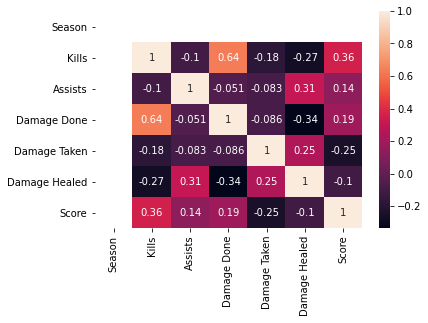

In [10]:
sns.heatmap(df_full.corr(), annot=True)

<AxesSubplot:>

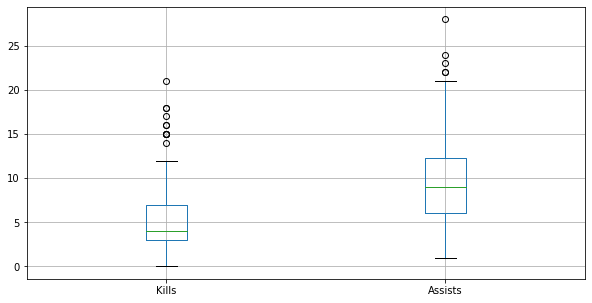

In [11]:
df_full[['Kills','Assists']].boxplot(figsize=(10,5))

<AxesSubplot:>

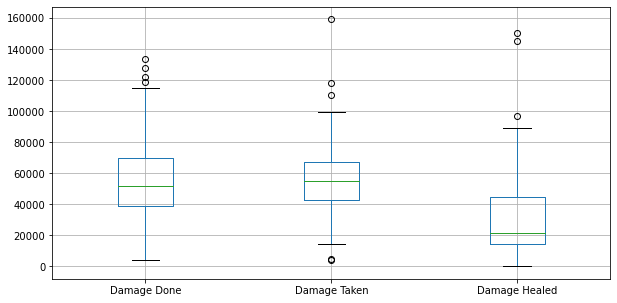

In [12]:
df_full.loc[:, df_full.columns.str.startswith('Damage')] \
       .boxplot(figsize=(10,5))

### General match winrate analysis

#### I. Overall winrate

In [13]:
df_full['Result'].value_counts(normalize=True)

Win     0.595
Loss    0.405
Name: Result, dtype: float64

#### II. Winrate & pickrate by pokemon

In [14]:
# Winrate & Pickrate by Pokemon
df_win = df_full.assign(val=1) \
                .pivot_table(index='Pokemon', columns='Result',
                             values='val', aggfunc='count') \
                .fillna(0)

df_win['Matches'] = df_win['Win'] + df_win['Loss']
df_win['Winrate'] = (df_win['Win'] / df_win['Matches'] * 100).round(2)
df_win['Pickrate'] = df_win['Matches'] / df_win['Matches'].sum().round(2) * 100

df_win[['Matches','Pickrate','Winrate']]

Result,Matches,Pickrate,Winrate
Pokemon,,,
Cinderace,2.0,1.0,100.00
Clefable,4.0,2.0,100.00
Delphox,8.0,4.0,62.50
Eldegoss,11.0,5.5,63.64
Goodra,1.0,0.5,100.00
Hoopa,54.0,27.0,51.85
Lapras,5.0,2.5,80.00
Mamoswine,42.0,21.0,54.76
Ninetales,1.0,0.5,0.00


#### III. Winrate & pickrate by Pokemon role

In [15]:
attackers = ['Sylveon','Delphox','Cinderace','Ninetales']
all_rounders = ['Urshifu']
supports = ['Hoopa','Eldegoss','Clefable']
defenders = ['Mamoswine','Lapras','Slowbro','Umbreon','Goodra']

def categorize_role(mon):
    if mon in attackers:
        return "Attacker"
    elif mon in all_rounders:
        return "All-Rounder"
    elif mon in supports:
        return "Supporter"
    elif mon in defenders:
        return "Defender"

df_role = df_win.copy().reset_index()
df_role['Role'] = df_role['Pokemon'].apply(lambda mon:categorize_role(mon))
df_role = df_role.groupby('Role').sum()
df_role['Winrate'] =  (df_role['Win'] / df_role['Matches'] * 100).round(2)
df_role[['Matches','Pickrate','Winrate']]

Result,Matches,Pickrate,Winrate
Role,,,
All-Rounder,1.0,0.5,0.00
Attacker,76.0,38.0,67.11
Defender,54.0,27.0,53.70
Supporter,69.0,34.5,56.52


#### IV. Winrate by queue type

In [16]:
df_queue = df_full.assign(val=1).pivot_table(index='Queue', columns='Result', values='val', aggfunc='count')
df_queue['Matches'] = df_queue['Win'] + df_queue['Loss']
df_queue['Win %'] = (df_queue['Win'] / df_queue['Matches'] * 100).round(2)
df_queue[['Matches', 'Win %']]

Result,Matches,Win %
Queue,,
Duo,37,64.86
Five,19,42.11
Solo,115,60.00
Trio,29,62.07


### Winrate analysis by team composition
#### Transform Pokemon and moves to tuples
Each Pokemon in the match chooses 1 move for their 1st move slot and 1 move for their 2nd move slot.

In [17]:
start = df_full.columns.get_loc("Self")
end = len(df_full.columns)
df_tuples = pd.DataFrame()
i = 1
name = 'Self '

for col in range(start, end, 3):
    df_tuples[name + str(i)] = df_full[[df_full.columns[col], 
                                        df_full.columns[col+1], 
                                        df_full.columns[col+2]]] \
                                        .apply(tuple, axis=1)
    name = 'Ally '
    if i >= 5:
        name = 'Opp '
    i += 1
df_tuples['Result'] = df_full['Result']
df_tuples = df_tuples.reset_index()

df_tuples.head(3)

,ID,Self 1,Ally 2,Ally 3,Ally 4,Ally 5,Opp 6,Opp 7,Opp 8,Opp 9,Opp 10,Result
0,1,"(Eldegoss, Pollen Puff, Cotton Guard)","(Sylveon, Hyper Voice, Calm Mind)","(Delphox, Fire Blast, Fire Spin)","(Umbreon, Foul Play, Snarl)","(Buzzwole, Superpower, Smack Down)","(Decidueye, Spirit Shackle, Shadow Sneak)","(Comfey, Floral Healing, Magical Leaf)","(Delphox, Mystical Fire, Fire Spin)","(Umbreon, Foul Play, Snarl)","(Azumarill, Aqua Tail, Play Rough)",Win
1,2,"(Mamoswine, Icicle Crash, Earthquake)","(Buzzwole, Leech Life, Smack Down)","(Cinderace, Pyro Ball, Flame Charge)","(Dragonite, Extreme Speed, Outrage)","(Espeon, Stored Power, Future Sight)","(Cinderace, Blaze Kick, Flame Charge)","(Leafeon, Solar Blade, Leaf Blade)","(Blissey, Soft-Boiled, Egg Bomb)","(Garchomp, Dragon Rush, Dragon Claw)","(Slowbro, Scald, Amnesia)",Win
2,3,"(Sylveon, Hyper Voice, Calm Mind)","(Dodrio, Drill Peck, Jump Kick)","(Eldegoss, Pollen Puff, Cotton Spore)","(Mr. Mime, Psychic, Guard Swap)","(Trevenant, Curse, Horn Leech)","(Urshifu, Surging Strikes, Liquidation)","(Chandelure, Overheat, Poltergeist)","(Dragonite, Extreme Speed, Outrage)","(Cinderace, Blaze Kick, Flame Charge)","(Goodra, Muddy Water, Power Whip)",Win


#### Transform data from wide to long

In [18]:
def label_role(row):
    if row['num'] < 6:
        return 'Ally'
    else:
        return 'Enemy'
    
df_wide = pd.wide_to_long(df_tuples, ['Ally ','Opp '], i='ID', j='num') \
            .reset_index()

df_wide['Other'] = df_wide['Ally '].combine_first(df_wide['Opp '])
df_wide['Role'] = df_wide.apply(lambda row: label_role(row), axis=1)
df_wide = df_wide.drop(columns=['num','Ally ','Opp '])

df_wide.head(10)

,ID,Result,Self 1,Other,Role
0,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Sylveon, Hyper Voice, Calm Mind)",Ally
1,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Delphox, Fire Blast, Fire Spin)",Ally
2,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Umbreon, Foul Play, Snarl)",Ally
3,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Buzzwole, Superpower, Smack Down)",Ally
4,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Decidueye, Spirit Shackle, Shadow Sneak)",Enemy
5,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Comfey, Floral Healing, Magical Leaf)",Enemy
6,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Delphox, Mystical Fire, Fire Spin)",Enemy
7,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Umbreon, Foul Play, Snarl)",Enemy
8,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Azumarill, Aqua Tail, Play Rough)",Enemy
9,2,Win,"(Mamoswine, Icicle Crash, Earthquake)","(Buzzwole, Leech Life, Smack Down)",Ally


In [19]:
df_wide = df_wide.rename(columns={'Self 1':'Self'}) \
                 .assign(Matches=1)
df_wide['Winrate'] = np.where(df_wide['Result']=='Win', 1, 0)
df_wide.head(10)

,ID,Result,Self,Other,Role,Matches,Winrate
0,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Sylveon, Hyper Voice, Calm Mind)",Ally,1,1
1,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Delphox, Fire Blast, Fire Spin)",Ally,1,1
2,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Umbreon, Foul Play, Snarl)",Ally,1,1
3,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Buzzwole, Superpower, Smack Down)",Ally,1,1
4,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Decidueye, Spirit Shackle, Shadow Sneak)",Enemy,1,1
5,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Comfey, Floral Healing, Magical Leaf)",Enemy,1,1
6,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Delphox, Mystical Fire, Fire Spin)",Enemy,1,1
7,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Umbreon, Foul Play, Snarl)",Enemy,1,1
8,1,Win,"(Eldegoss, Pollen Puff, Cotton Guard)","(Azumarill, Aqua Tail, Play Rough)",Enemy,1,1
9,2,Win,"(Mamoswine, Icicle Crash, Earthquake)","(Buzzwole, Leech Life, Smack Down)",Ally,1,1


#### I. Ally matchup winrate per Pokemon

In [21]:
df_wide_a = df_wide[df_wide.Role=='Ally']
df_wide_a.groupby(['Role','Self Mon',[i[0] for i in df_wide_a['Other']]]) \
       .agg({'Matches':'count','Winrate':'mean'}) \
       .sort_values(['Role','Self Mon','Matches'], ascending=[True,True,False])

KeyError: 'Self Mon'

#### II. Enemy matchup winrate per Pokemon

In [ ]:
df_wide_e = df_wide[df_wide.Role=='Enemy']
df_wide_e.groupby(['Role','Self Mon',[i[0] for i in df_wide_e['Other']]]) \
       .agg({'Matches':'count','Winrate':'mean'}) \
       .sort_values(['Role','Self Mon','Matches'], ascending=[True,True,False])

#### III. Matchup winrate per Pokemon + Move Build

In [ ]:
df_wide.groupby(['Role','Self',[i[0] for i in df_wide['Other']]]) \
       .agg({'Matches':'count','Winrate':'mean'}) \
       .sort_values(['Role','Self','Matches'], ascending=[True,True,False])

### Conclusions
Some reasonable conclusions can be drawn from the data points with sufficient number of records (e.g. winrate of certain Pokemon, winrate vs. Pokemon role, winrate vs. queue type). For instance, a commonly-held belief is that supporters and defenders can't carry matches as well as damage-based characters. This makes sense and is supported by the data, with attacker Pokemon having a significantly higher winrate than supporters or defenders.

On the other hand, matchup data will require much more data to draw meaningful results. With 59 Pokemon in the game right now, it is difficult to gather enough data on facing/teaming with certain Pokemon, especially when some Pokemon are much less popular than others. Nevertheless, Pokemon with high pickrate like Sylveon begin to show promising trends against certain matchups.